# WNSZ1 CHME0016 Submission
## Cleveland Heart Dataset

In [1]:
# general set up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
cmap = cm.autumn

In [2]:
# scikitlearn libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold, learning_curve,  cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.inspection import permutation_importance

# INTRODUCTION


In [3]:
# import dataset
cleveland_heart_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
cleveland_heart_df = pd.read_csv(cleveland_heart_url, header = None)
cleveland_heart_df = cleveland_heart_df.set_axis([columns], axis = 1, inplace = False)

# data cleansing - for ease of understanding columns
cleveland_heart_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_hr_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassaemia', 'target']
cleveland_heart_df.head()


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_hr_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassaemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Feature Evaluation
***Target Variable***

In [63]:
print(f"Data has {cleveland_heart_df.shape[1]} variables (including target column) and \
{cleveland_heart_df.shape[0]} observations. \nFeatures included are: \n{cleveland_heart_df.columns.to_list()}\n")

Data has 14 variables (including target column) and 303 observations. 
Features included are: 
['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_hr_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassaemia', 'target']



In [64]:
cleveland_heart_df.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [4]:
# readjusting target variable to make it binary
cleveland_heart_df["target"] = cleveland_heart_df["target"].apply(lambda x: 0 if x == 0 else 1)
no_heartdisease = len(cleveland_heart_df[cleveland_heart_df.target == 0])
heartdisease = len(cleveland_heart_df[cleveland_heart_df.target == 1])

print("Percentage of study population that do not have heart disease: {:.2f}%".format((no_heartdisease / (len(cleveland_heart_df.target)) * 100)))
print("Percentage of study population that do have heart disease: {:.2f}%".format((heartdisease / (len(cleveland_heart_df.target)) * 100)))
# mostly balanced between classes, will stratify to ensure even sampling


Percentage of study population that do not have heart disease: 54.13%
Percentage of study population that do have heart disease: 45.87%


In [5]:
continuous_var = ["age", "resting_bp", "cholesterol", "max_hr_achieved", "st_depression"]
categorical_var = ["chest_pain_type", "rest_ecg", "st_slope", "num_major_vessels", "thalassaemia", \
                  "sex", "fasting_blood_sugar", "exercise_induced_angina", "target"]

***Univariate Analysis***

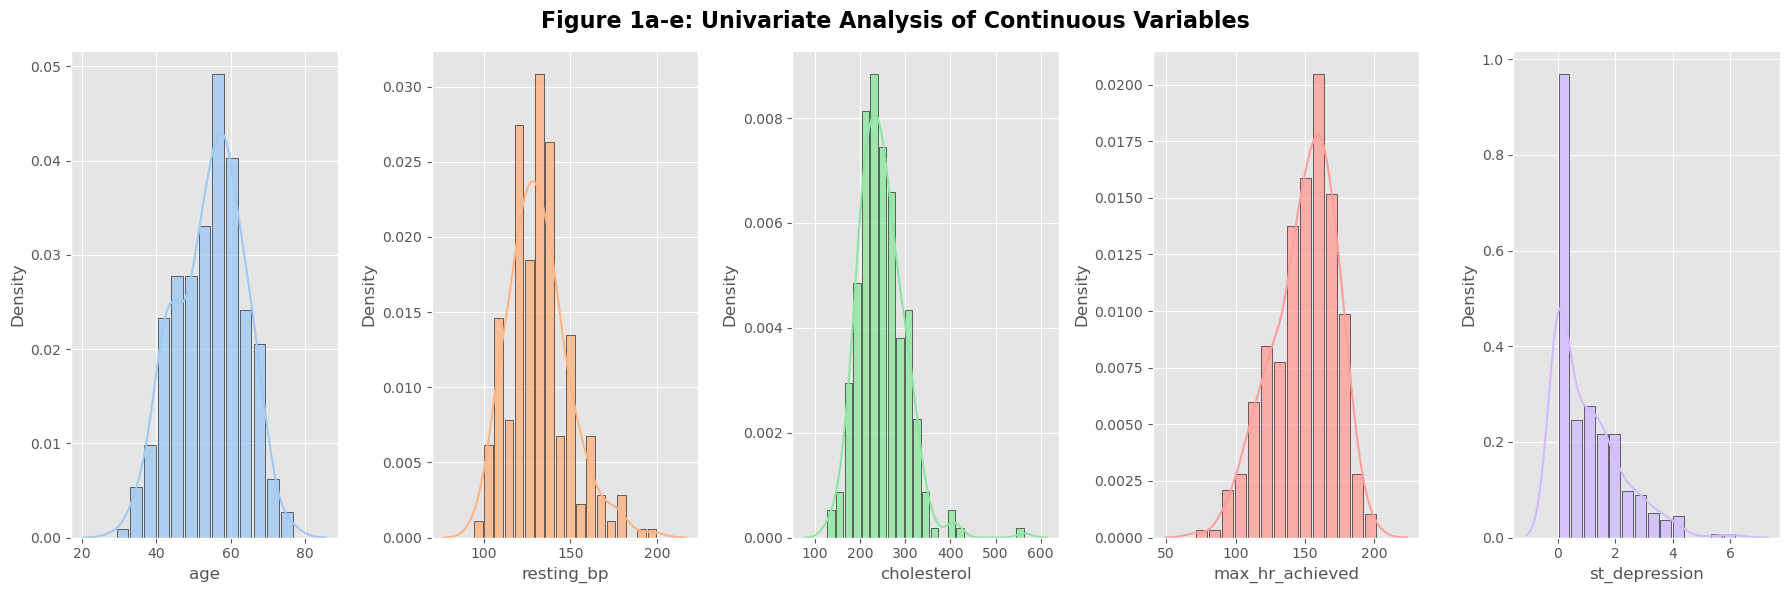

In [8]:
# continuous variables 

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))
boxplot_colours = sns.color_palette("pastel", n_colors = 5)
for i, var in enumerate(continuous_var):
    sns.distplot(cleveland_heart_df[var], ax=axs[i], color=boxplot_colours[i],
                 hist_kws={
                     'rwidth': 0.85,
                     'edgecolor': 'black',
                     'alpha': 0.8})
fig.suptitle("Figure 1a-e: Univariate Analysis of Continuous Variables", fontsize = 16, fontweight = "bold")
plt.tight_layout()
plt.show()


In [12]:
# categorical/binary analysis
def categorical_analysis(df, cols, hue=None, rows=3, columns=3):  
    """labelled and colour coded visualisations of the categorical (including binary) variables"""
    fig, axes = plt.subplots(rows, columns, figsize=(10, 10))
    axes = axes.flatten()

    for var, count in zip(df[cols].columns, axes):
        sns.countplot(x=var,
                    data=df,
                    hue=hue,
                    ax=count,
                    order=df[var].value_counts().index)
        count.tick_params()        
        total = float(len(df[var]))        
        count.set_title(f'{str(var).capitalize()}')
        
        
        for p in count.patches:
            height = p.get_height()
            count.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

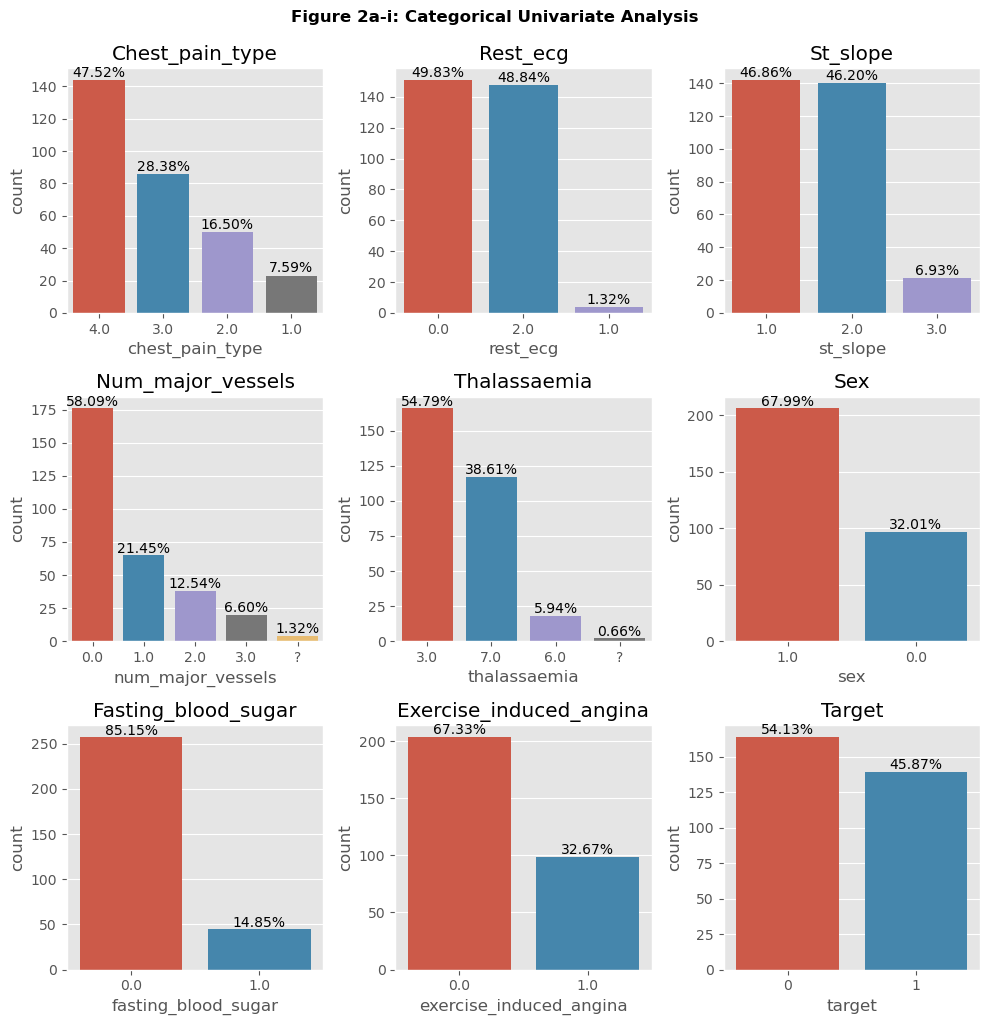

In [10]:
categorical_analysis(cleveland_heart_df, categorical_var)
plt.suptitle("Figure 2a-i: Categorical Univariate Analysis", fontsize = 12, fontweight = "bold", y = 1.02)
plt.show()

***Bivariate Analysis vs Target***

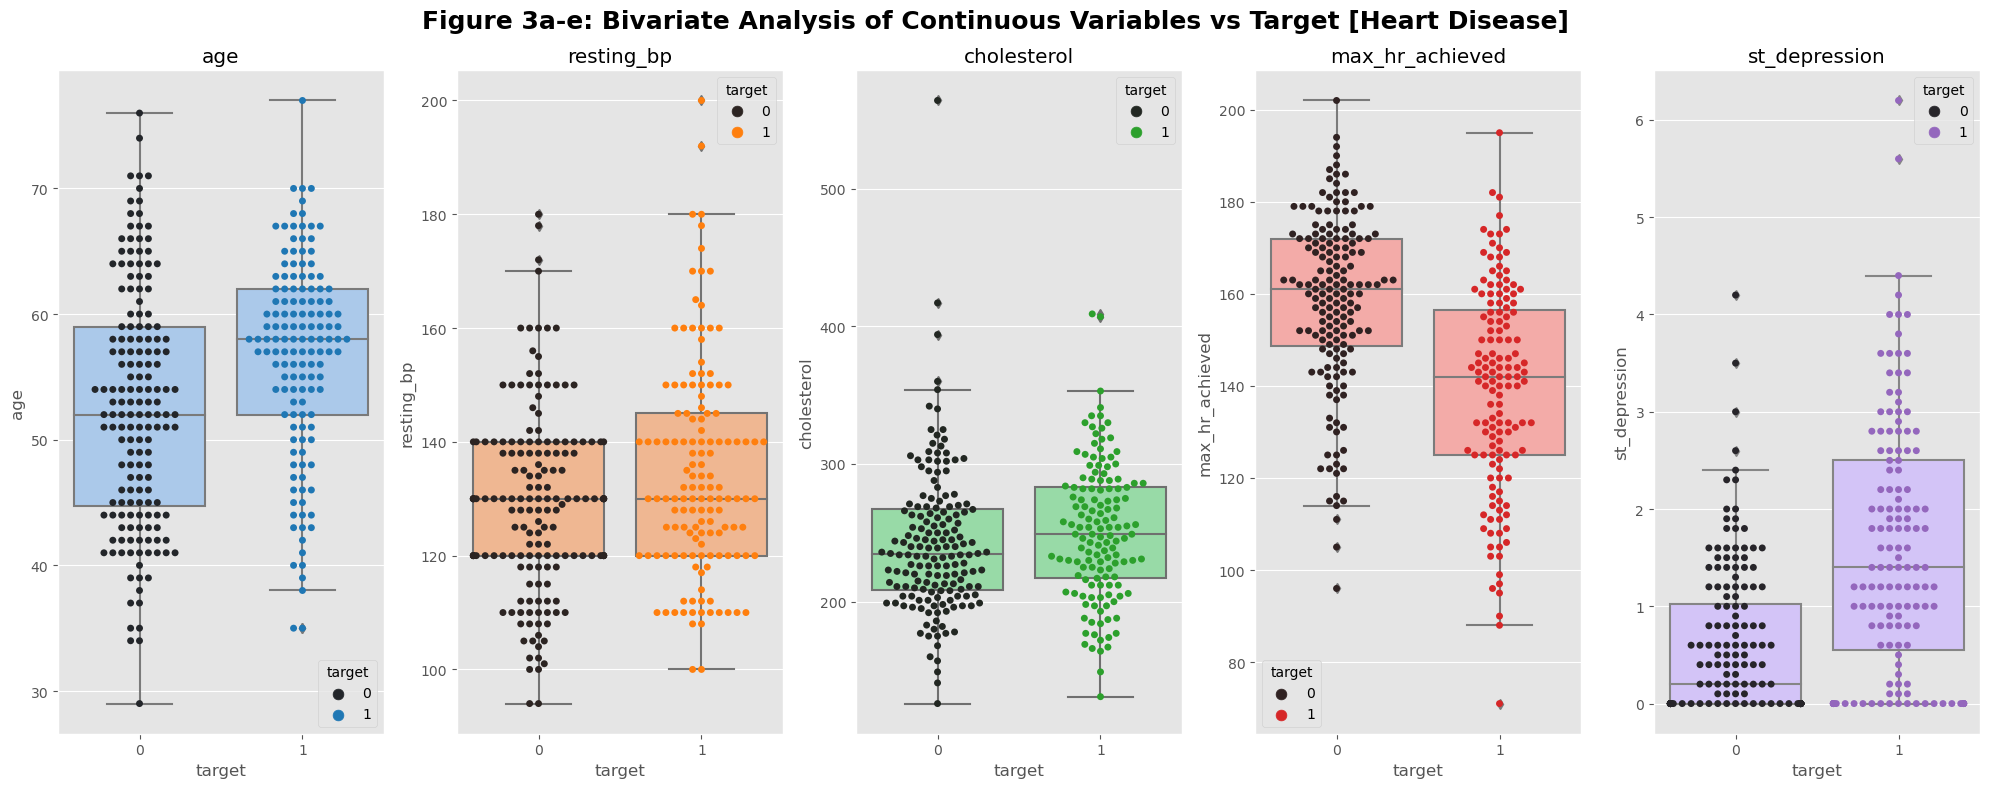

In [11]:
# continuous variables

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
boxplot_colours = sns.color_palette("pastel", n_colors = 5)
swarm_colours = sns.color_palette('tab10', n_colors=5)
for i, var in enumerate(continuous_var):
    sns.boxplot(x="target", y = cleveland_heart_df[var], data = cleveland_heart_df, ax=axs[i], color=boxplot_colours[i])
    sns.swarmplot(x= "target", y = cleveland_heart_df[var], data = cleveland_heart_df, ax=axs[i], \
                  hue = "target", color=swarm_colours[i])
    axs[i].set_title(var)
fig.suptitle("Figure 3a-e: Bivariate Analysis of Continuous Variables vs Target [Heart Disease]", fontsize = 18, fontweight = "bold")
plt.tight_layout()
plt.show()

Text(0.5, 1.01, 'Figure 4a-i: Categorical Bivariate Analysis')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


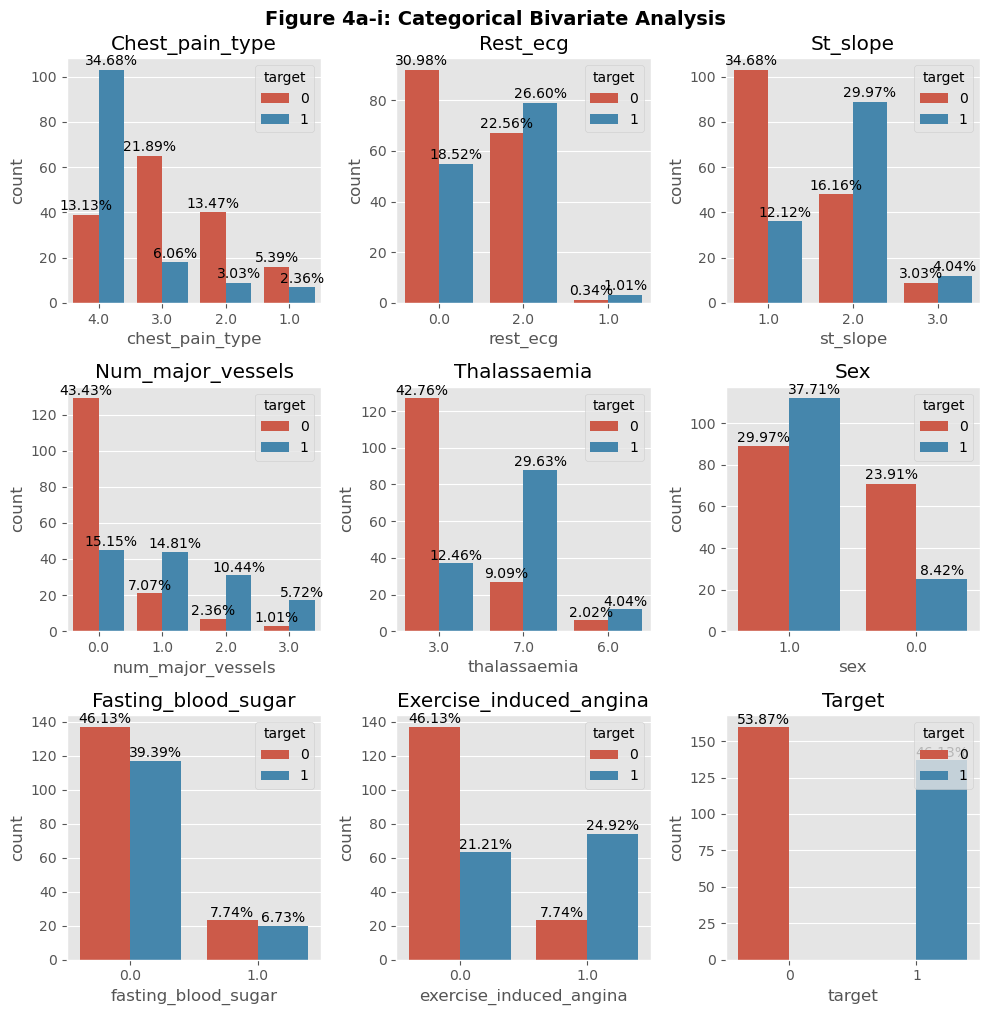

In [40]:
# categorical bivariate analysis
categorical_analysis(cleveland_heart_df, categorical_var, "target", rows = 3, columns = 3)
plt.suptitle("Figure 4a-i: Categorical Bivariate Analysis", fontsize = 14, fontweight = "bold", y = 1.01)

***Multivariate Analysis vs Target***

<Figure size 1600x1000 with 0 Axes>

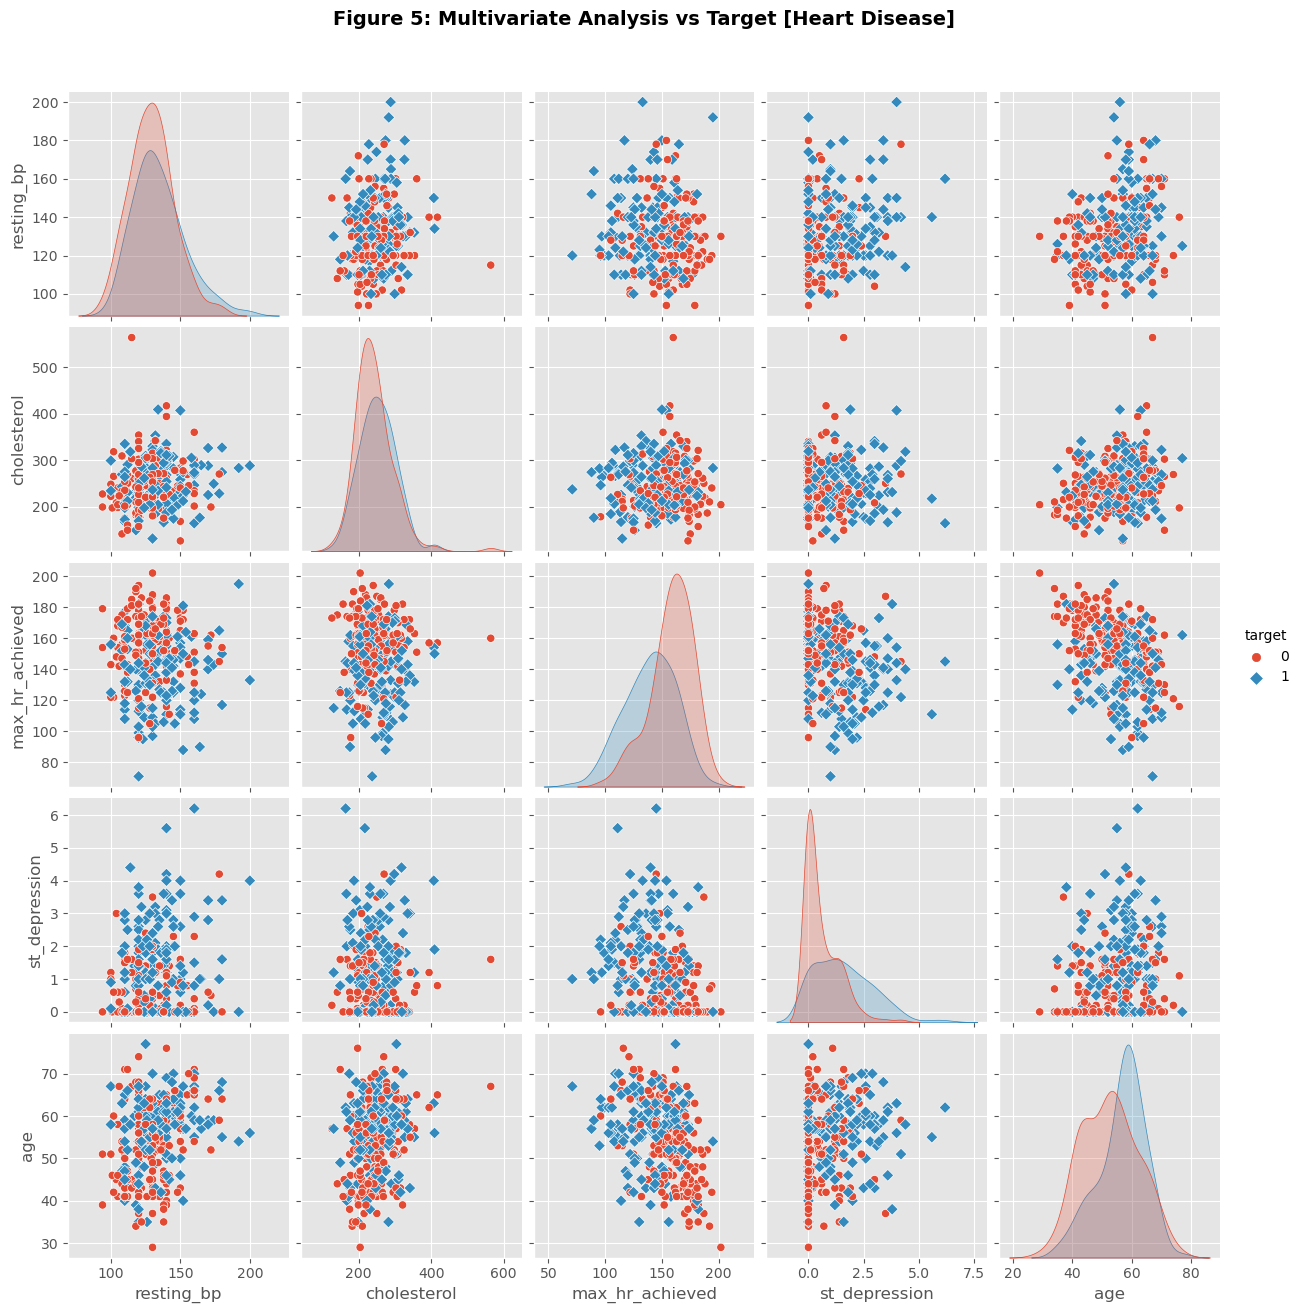

In [13]:
# continuous variables 
fig = plt.figure(figsize=(16,10))
sns.pairplot(cleveland_heart_df[['resting_bp','cholesterol','max_hr_achieved','st_depression','age', 'target']], \
             hue='target',markers=['o','D'])
plt.suptitle("Figure 5: Multivariate Analysis vs Target [Heart Disease]", fontsize = 14, fontweight = "bold", y = 1.05)

plt.show()

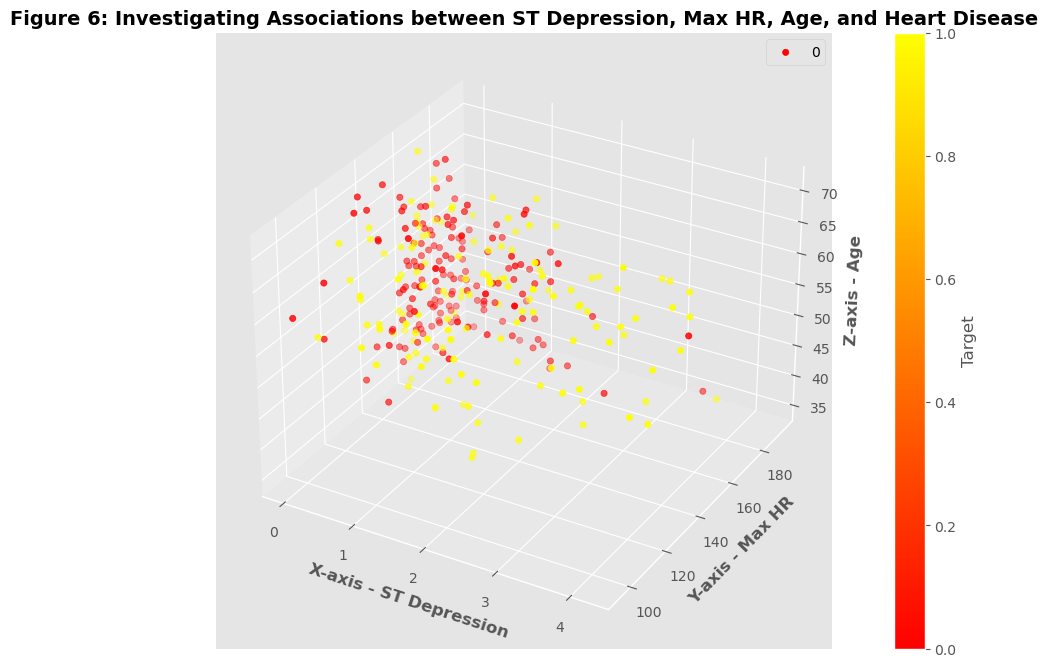

In [44]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

x_vals = cleveland_heart_df["st_depression"]
y_vals = cleveland_heart_df["max_hr_achieved"]
z_vals = cleveland_heart_df["age"]
c_vals = cleveland_heart_df["target"]
c_vals_subset = c_vals[:len(x_vals)]

ax.scatter(x_vals, y_vals, z_vals, c = c_vals, marker = "o", cmap = cmap)
ax.set_xlabel('X-axis - ST Depression', fontweight = "bold")
ax.set_ylabel('Y-axis - Max HR', fontweight = "bold")
ax.set_zlabel('Z-axis - Age', fontweight = "bold")
legend_labels = ["0", "1"]
norm = plt.Normalize(c_vals_subset.min(), c_vals_subset.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Target')
plt.legend(labels=legend_labels)
plt.title("Figure 6: Investigating Associations between ST Depression, Max HR, Age, and Heart Disease",\
          fontweight = "bold", fontsize = 14)
plt.show()


# METHODS


### Feature Pre-Processing Tasks

***Missing/Null Values***

In [15]:
print(cleveland_heart_df.shape)
cleveland_heart_df.info() # no missing values 

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    float64
 2   chest_pain_type          303 non-null    float64
 3   resting_bp               303 non-null    float64
 4   cholesterol              303 non-null    float64
 5   fasting_blood_sugar      303 non-null    float64
 6   rest_ecg                 303 non-null    float64
 7   max_hr_achieved          303 non-null    float64
 8   exercise_induced_angina  303 non-null    float64
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    float64
 11  num_major_vessels        303 non-null    object 
 12  thalassaemia             303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(11), 

In [16]:
cleveland_heart_df.isnull().sum() # confirming no missing values

age                        0
sex                        0
chest_pain_type            0
resting_bp                 0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_hr_achieved            0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassaemia               0
target                     0
dtype: int64

***Erroneous Values***

In [13]:
# erroneous values noted for major vessels and thalassaemia
non_continuous_variables = cleveland_heart_df[["sex", "chest_pain_type", "fasting_blood_sugar", "rest_ecg", "exercise_induced_angina", "st_slope", "num_major_vessels", "thalassaemia"]]
for var in non_continuous_variables:
    print(var, '\n', non_continuous_variables[var].value_counts(), '\n')


sex 
 1.0    206
0.0     97
Name: sex, dtype: int64 

chest_pain_type 
 4.0    144
3.0     86
2.0     50
1.0     23
Name: chest_pain_type, dtype: int64 

fasting_blood_sugar 
 0.0    258
1.0     45
Name: fasting_blood_sugar, dtype: int64 

rest_ecg 
 0.0    151
2.0    148
1.0      4
Name: rest_ecg, dtype: int64 

exercise_induced_angina 
 0.0    204
1.0     99
Name: exercise_induced_angina, dtype: int64 

st_slope 
 1.0    142
2.0    140
3.0     21
Name: st_slope, dtype: int64 

num_major_vessels 
 0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: num_major_vessels, dtype: int64 

thalassaemia 
 3.0    166
7.0    117
6.0     18
?        2
Name: thalassaemia, dtype: int64 



In [4]:
cleveland_heart_df = cleveland_heart_df[cleveland_heart_df.thalassaemia != "?"]
cleveland_heart_df = cleveland_heart_df[cleveland_heart_df.num_major_vessels != "?"]

In [5]:
cleveland_heart_df.thalassaemia.value_counts()

3.0    164
7.0    115
6.0     18
Name: thalassaemia, dtype: int64

In [9]:
cleveland_heart_df.num_major_vessels.value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: num_major_vessels, dtype: int64

***Data Types***

In [6]:
cleveland_heart_df['num_major_vessels'] = cleveland_heart_df['num_major_vessels'].astype(float)
cleveland_heart_df['thalassaemia'] = cleveland_heart_df['thalassaemia'].astype(float)
cleveland_heart_df.dtypes

age                        float64
sex                        float64
chest_pain_type            float64
resting_bp                 float64
cholesterol                float64
fasting_blood_sugar        float64
rest_ecg                   float64
max_hr_achieved            float64
exercise_induced_angina    float64
st_depression              float64
st_slope                   float64
num_major_vessels          float64
thalassaemia               float64
target                       int64
dtype: object

***Checking for Duplicates***

In [24]:
cleveland_heart_df.duplicated().value_counts() # no duplicate rows 

False    297
dtype: int64

***Outliers***

In [25]:
cleveland_heart_df.describe()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_hr_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassaemia,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


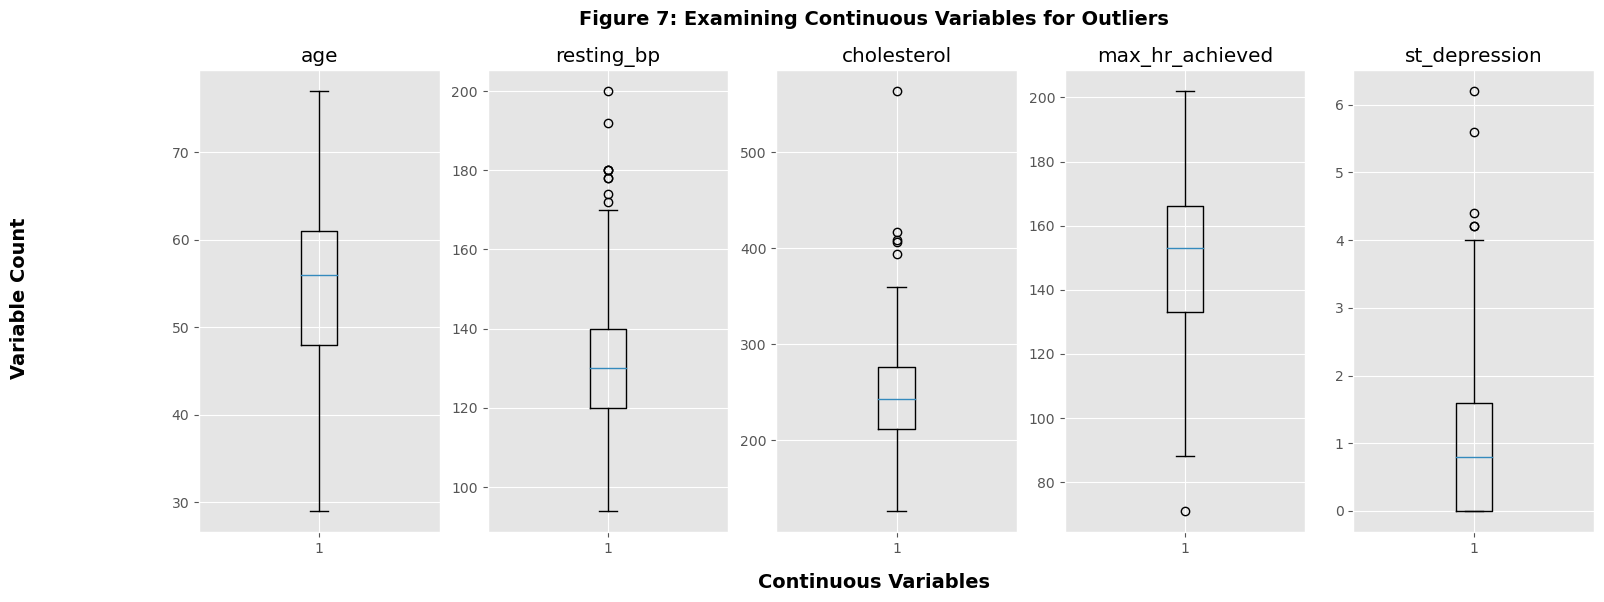

In [26]:
# examining continuous variables for outliers

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_var), figsize=(18,6))

# loop through the continuous variables and create a boxplot on each subplot
for var, col in enumerate(continuous_var):
    axes[var].boxplot(cleveland_heart_df[col])
    axes[var].set_title(col)
fig.suptitle("Figure 7: Examining Continuous Variables for Outliers", fontsize = 14, fontweight = "bold")
fig.supylabel("Variable Count", fontsize = 14, fontweight = "bold")
fig.supxlabel("Continuous Variables", fontsize = 14, fontweight = "bold")
plt.show()

#outliers noted in resting BP, cholesterol, max HR, and ST depression

In [8]:
def detect_outliers(label=None):
    """ function for detecting points outside of the inter quartile range, 
    the function can return only the outliers or the original dataset excluding the outliers"""
    
    Q1 = cleveland_heart_df[label].quantile(0.25)
    Q3 = cleveland_heart_df[label].quantile(0.75)
    IQR = Q3 - Q1
    interval = ((cleveland_heart_df[label] > Q1 - 1.5*IQR) & (cleveland_heart_df[label] < Q3 + 1.5*IQR))
    return cleveland_heart_df[interval], cleveland_heart_df[~interval]

In [9]:
# resting BP
not_cleveland_out_rbp, cleveland_out_rbp = detect_outliers('resting_bp')
print(f'Outliers in resting blood pressure represent {round((cleveland_out_rbp.shape[0]*100)/cleveland_heart_df.shape[0], 2)}% of our dataset')
#ST depression
not_cleveland_out_stdepress, cleveland_out_stdepress = detect_outliers('st_depression')
print(f'Outliers in ST depression represent {round((cleveland_out_stdepress.shape[0]*100)/cleveland_heart_df.shape[0], 2)}% of our dataset')
# cholesterol
not_cleveland_out_chol, cleveland_out_chol = detect_outliers('cholesterol')
print(f'Outliers in cholesterol represent {round((cleveland_out_chol.shape[0]*100)/cleveland_heart_df.shape[0], 2)}% of our dataset')
# max HR achieved
not_cleveland_out_maxhr, cleveland_out_maxhr = detect_outliers("max_hr_achieved")
print(f"Outliers in Max HR represent {round((cleveland_out_maxhr.shape[0]*100)/cleveland_heart_df.shape[0], 2)}% of our dataset")


Outliers in resting blood pressure represent 4.38% of our dataset
Outliers in ST depression represent 2.69% of our dataset
Outliers in cholesterol represent 1.68% of our dataset
Outliers in Max HR represent 0.34% of our dataset


In [7]:
def cap_data(df):
    for col in df.columns:
        print("capping the",col)
        if ((df[col].dtype)=='float64'):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

cleveland_heart = cap_data(cleveland_heart_df)
print(cleveland_heart.shape)

capping the age
capping the sex
capping the chest_pain_type
capping the resting_bp
capping the cholesterol
capping the fasting_blood_sugar
capping the rest_ecg
capping the max_hr_achieved
capping the exercise_induced_angina
capping the st_depression
capping the st_slope
capping the num_major_vessels
capping the thalassaemia
capping the target
(297, 14)


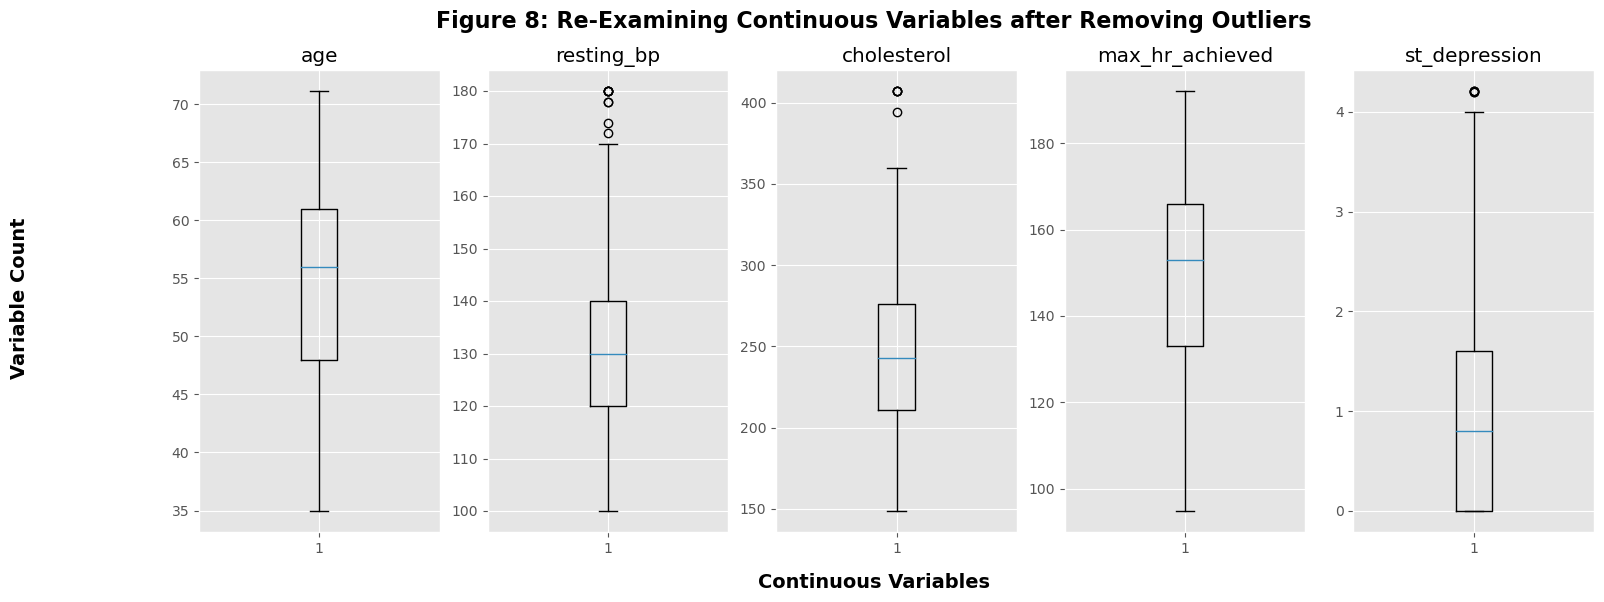

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_var), figsize=(18,6))

# loop through the continuous variables and create a boxplot on each subplot
for var, col in enumerate(continuous_var):
    axes[var].boxplot(cleveland_heart[col])
    axes[var].set_title(col)
fig.suptitle("Figure 8: Re-Examining Continuous Variables after Removing Outliers", fontsize = 16, fontweight = "bold")
fig.supylabel("Variable Count", fontsize = 14, fontweight = "bold")
fig.supxlabel("Continuous Variables", fontsize = 14, fontweight = "bold")
plt.show()

### Feature Selection and Extraction
***Correlation Matrix***

In [8]:
cleveland_heart_corr = np.round(cleveland_heart.corr(), 2)
cleveland_heart_corr["target"].sort_values(ascending = False)

# noted low correlation with FBS (0.00) and cholesterol (0.10)

target                     1.00
num_major_vessels          0.52
thalassaemia               0.51
st_depression              0.50
chest_pain_type            0.40
exercise_induced_angina    0.39
st_slope                   0.37
sex                        0.23
age                        0.22
rest_ecg                   0.18
resting_bp                 0.16
cholesterol                0.08
fasting_blood_sugar        0.05
max_hr_achieved           -0.42
Name: target, dtype: float64

Text(0.5, 1.0, 'Figure 9: Correlation Matrix')

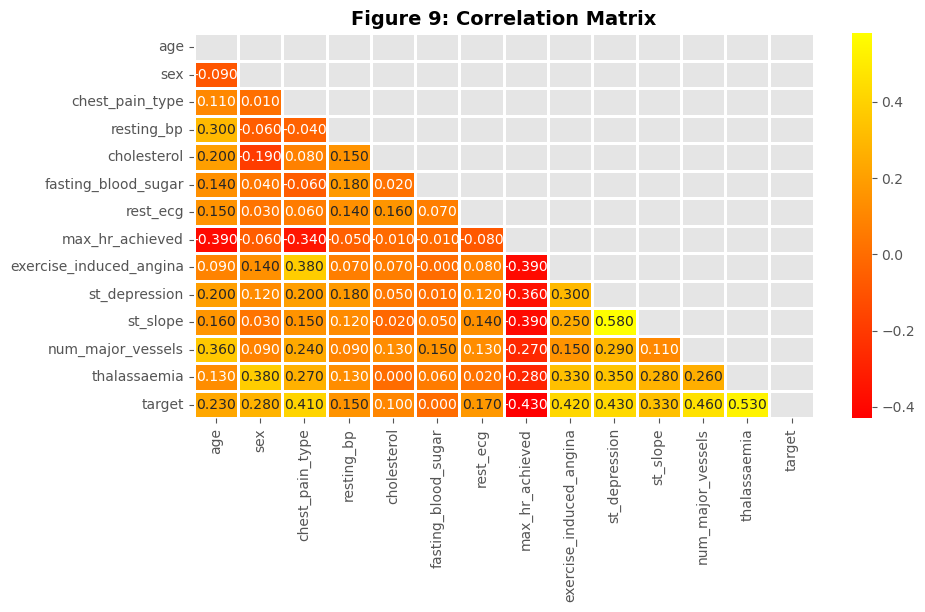

In [22]:
mask = np.triu(np.ones_like(cleveland_heart_corr, dtype=bool))

plt.figure(figsize=(10, 5))
sns.heatmap(cleveland_heart_corr,
            mask = mask,
            annot=True,
            fmt='.3f',
            cmap=cmap,
            linewidths=1,
            cbar=True)
plt.title("Figure 9: Correlation Matrix", fontsize = 14, fontweight = "bold")

# high correlation between st_depression and st_slope (0.540) - keeping both introduces collinearity 

Text(70.5815972222222, 0.5, 'Highly Correlated Features')

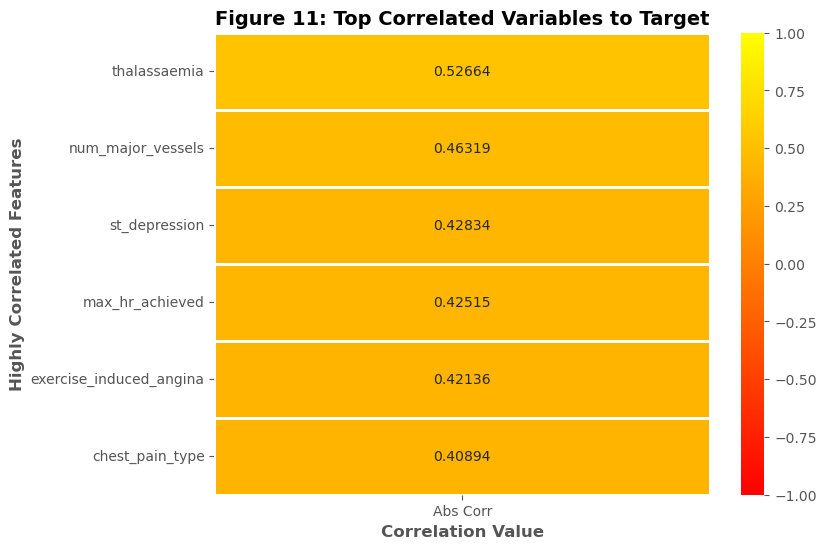

In [51]:
# Top correlated variables to the target

cleveland_correlations = cleveland_heart.corrwith(cleveland_heart['target']).iloc[:-1].to_frame()
cleveland_correlations['Abs Corr'] = cleveland_correlations[0].abs()
cleveland_sorted_correlations = cleveland_correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cleveland_sorted_correlations.to_frame()[cleveland_sorted_correlations>=.4], cmap=cmap, annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax)
plt.title("Figure 11: Top Correlated Variables to Target", fontsize = 14, fontweight = "bold")
plt.xlabel("Correlation Value", fontweight = "bold")
plt.ylabel("Highly Correlated Features", fontweight = "bold")


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'fasting_blood_sugar'),
  Text(0, 1.5, 'cholesterol'),
  Text(0, 2.5, 'resting_bp'),
  Text(0, 3.5, 'rest_ecg')])

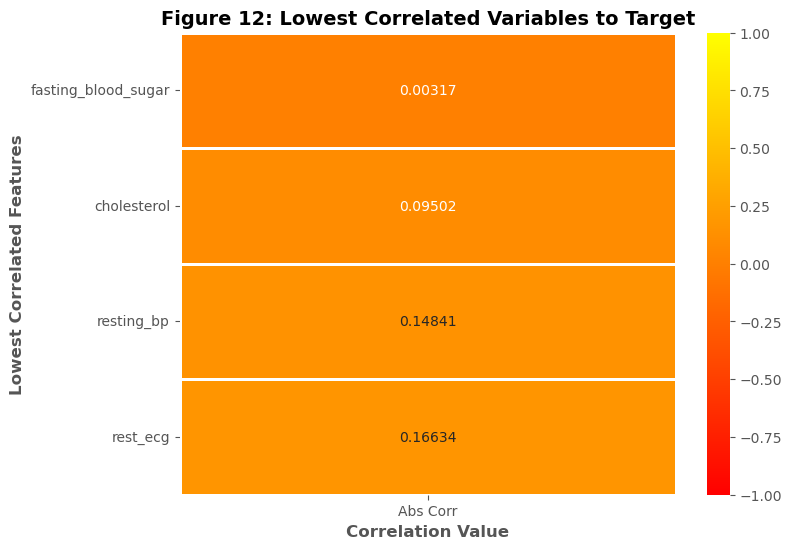

In [50]:
# Poorly correlated features to the target

cleveland_correlations_poor = cleveland_heart.corrwith(cleveland_heart['target']).iloc[:-1].to_frame()
cleveland_correlations['Abs Corr'] = cleveland_correlations[0].abs()
cleveland_sorted_correlations = cleveland_correlations.sort_values('Abs Corr')['Abs Corr']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cleveland_sorted_correlations.to_frame()[cleveland_sorted_correlations<=0.2], cmap=cmap, annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax)
plt.title("Figure 12: Lowest Correlated Variables to Target", fontsize = 14, fontweight = "bold")
plt.xlabel("Correlation Value", fontweight = "bold")
plt.ylabel("Lowest Correlated Features", fontweight = "bold")
plt.yticks(rotation = 0)


In [9]:
# dropping variables with low correlation to the target (FBS) and variable with high collinearity (ST-slope)
cleveland_heart_final = cleveland_heart.drop(["fasting_blood_sugar", "st_slope"], axis = 1).copy()
print(cleveland_heart_final.shape)
cleveland_heart_final.head()

(297, 12)


,age,sex,chest_pain_type,resting_bp,cholesterol,rest_ecg,max_hr_achieved,exercise_induced_angina,st_depression,num_major_vessels,thalassaemia,target
0,63.0,1.0,1.0,145.0,233.0,2.0,150.0,0.0,2.3,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,2.0,108.0,1.0,1.5,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,2.0,129.0,1.0,2.6,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,2.0,172.0,0.0,1.4,0.0,3.0,0


### Model Selection

***Chosen Classifiers:***
- Random Forest
- K-Nearest Neighbour

In [13]:
X = cleveland_heart.drop(["target"], axis = 1)
y = cleveland_heart["target"]
random_state = 16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = random_state)


# further feature pre-preprocessing efforts 
# categorical variables 
categorical_train_feat = pd.get_dummies(data=cleveland_heart_final[['sex', 'chest_pain_type', 'rest_ecg', 'exercise_induced_angina', 'num_major_vessels']])
X.drop(['sex', 'chest_pain_type', 'rest_ecg', 'exercise_induced_angina', 'num_major_vessels'], axis=1, inplace=True)
X = pd.concat([X, categorical_train_feat], axis=1)

# scaling and normalizing data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# supervised models for evaluation
classifiers = {
    "random_forest": RandomForestClassifier(random_state = random_state),
    "knn": KNeighborsClassifier()}

models = [
    "Random Forest",
    'K-Nearest Neighbours']


***Model Assessment***
- used at each step of hypertuning to assess the model by evaluating the precision, recall, F1 score, and to generate a confusion matrix 

In [14]:
from sklearn.model_selection import cross_val_predict

def model_assessment(model_key, cv=5):
    """Function to validate the model at each step of tuning. 
    The function returns a dataframe with the performance metrics as well as a confusion matrix."""
    
    model = classifiers[model_key]
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    print((model.__class__.__name__).center(65,' '))
    print(classification_report(y_train, y_pred, target_names=['0','1']))
    conf_matrix = confusion_matrix(y_train, y_pred)
    performance_df = pd.DataFrame(columns=["0","1"], index= ["0","1"], data = conf_matrix)
    
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(performance_df, annot=True,cmap=cmap, fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False, annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)
    plt.show()
    
    return performance_df


In [15]:
model_assessment("random_forest")

                      RandomForestClassifier                     


ValueError: Number of classes, 5, does not match size of target_names, 2. Try specifying the labels parameter

                       KNeighborsClassifier                      
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.86      0.78      0.82        95

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



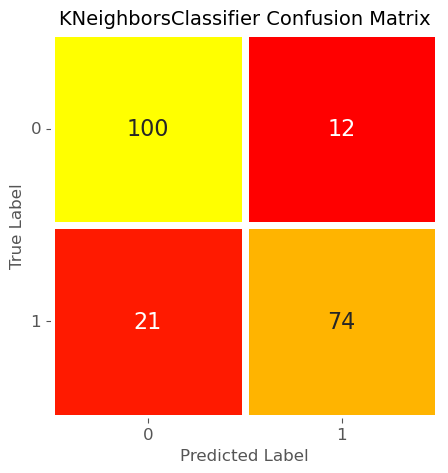

,0,1
0,100,12
1,21,74


In [16]:
model_assessment("knn")

***Hyperparameter Tuning using GridSearchCV***

 
                            random_forest                             
######################################################################
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Accuracy: 86.67%
ROC AUC: 0.925
Recall: 0.786
Precision: 0.872
F1-Score: 0.865
Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=5,
                       random_state=16)
 
                                 knn                                  
######################################################################
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Accuracy: 83.33%
ROC AUC: 0.887
Recall: 0.857
Precision: 0.836
F1-Score: 0.834
Best Estimator: KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=11)
 


Text(0.5, 1.0, 'Grid Search Results')

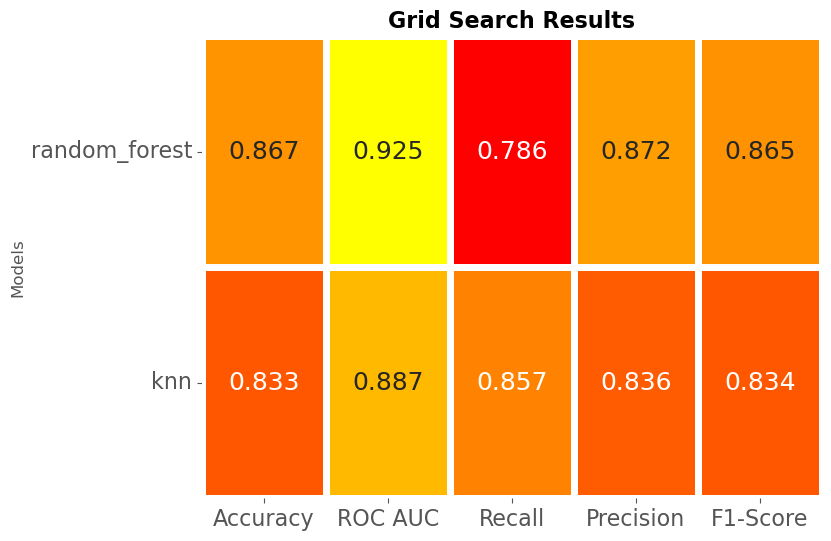

In [44]:
rf_param_grid = {"max_depth": [2,3,5],
                 "n_estimators": [50,100,150],
                 "min_samples_split": [1,5,10],
                "criterion": ["gini", "entropy"],
                }

knn_param_grid = {"n_neighbors": [5, 9, 11, 13, 15, 17],
                 "n_jobs": [-1, 0, 1],
                 "leaf_size": [1,3,5],
                 "p": [1,2]}



classifier_param = [rf_param_grid,
                    knn_param_grid]

accuracy = []
best_estimators = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


for model_name, model in classifiers.items():
    print(" ")
    print((model_name).center(70,' ')+'\n'+'#'*70)
    clf = GridSearchCV(model, param_grid=classifier_param[list(classifiers.keys()).index(model_name)],
                       cv=StratifiedKFold(n_splits=10),
                       scoring="f1", n_jobs=-1, verbose=2)
    
    clf.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(clf.predict(X_test), y_test))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
    recall_scores.append(recall_score(y_test, clf.predict(X_test)))
    precision_scores.append(precision_score(y_test, clf.predict(X_test), average='weighted'))
    f1_scores.append(f1_score(y_test, clf.predict(X_test), average='weighted'))
    best_estimators.append(clf.best_estimator_)
    
    print("Accuracy: {}%".format(round(accuracy[-1]*100,2)))
    print("ROC AUC: {}".format(round(roc_auc_scores[-1],3)))
    print("Recall: {}".format(round(recall_scores[-1],3)))
    print("Precision: {}".format(round(precision_scores[-1],3)))
    print("F1-Score: {}".format(round(f1_scores[-1],3)))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print(" ")
cv_results = pd.DataFrame({"Accuracy":accuracy,
                           "ROC AUC":roc_auc_scores,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models": list(classifiers.keys())})

cv_results.index = cv_results["Models"]
cv_results = cv_results.drop(["Models"], axis=1)

f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cv_results, annot=True,cmap=cmap,
            fmt='.3f',ax=ax,linewidths=5,
            cbar=False,annot_kws={"size": 18})

plt.xticks(size=16)
plt.yticks(size=16, rotation=0)
plt.title("Grid Search Results", size=16, fontweight = "bold")


# RESULTS


### Tuned Models with Optimised Parameters

In [42]:
best_estimators

[RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=5,
                        random_state=16),
 KNeighborsClassifier(n_neighbors=11)]

***Final Performance Metrics and Confusion Matrices***

                      RandomForestClassifier                     
                  precision    recall  f1-score   support

No Heart Disease       0.77      0.85      0.81        48
   Heart Disease       0.81      0.71      0.76        42

        accuracy                           0.79        90
       macro avg       0.79      0.78      0.79        90
    weighted avg       0.79      0.79      0.79        90



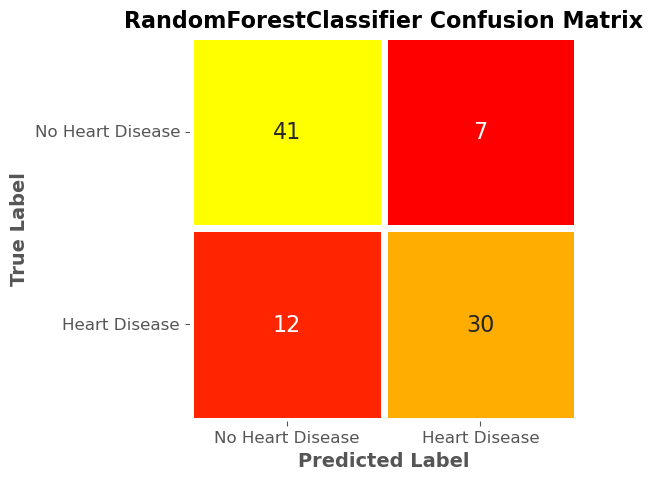

                       KNeighborsClassifier                      
                  precision    recall  f1-score   support

No Heart Disease       0.79      0.85      0.82        48
   Heart Disease       0.82      0.74      0.78        42

        accuracy                           0.80        90
       macro avg       0.80      0.80      0.80        90
    weighted avg       0.80      0.80      0.80        90



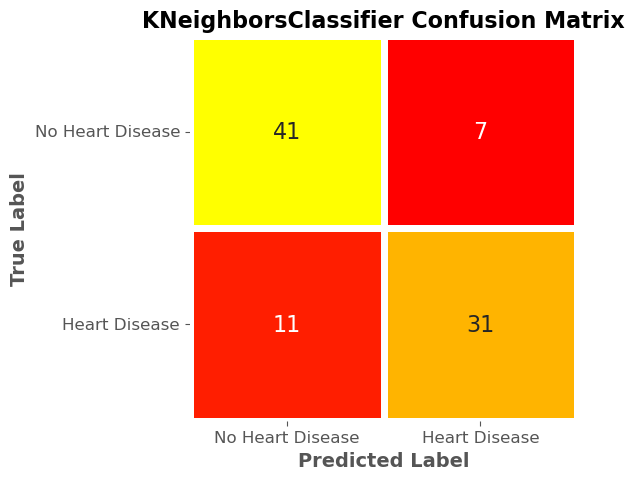

In [45]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

for i, model in enumerate(best_estimators):
    skf = StratifiedKFold(n_splits=10)
    y_pred = cross_val_predict(model, X_test, y_test, cv=skf)
    print((model.__class__.__name__).center(65,' '))
    print(classification_report(y_test, y_pred, target_names=['No Heart Disease','Heart Disease']))
    conf_matrix = confusion_matrix(y_test, y_pred)
    performance_df = pd.DataFrame(columns=["No Heart Disease","Heart Disease"], \
                                  index= ["No Heart Disease","Heart Disease"], data = conf_matrix)
    
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(performance_df, annot=True,cmap=cmap, fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False, annot_kws={"size": 16})
    plt.xlabel("Predicted Label", fontsize = 14, fontweight = "bold")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label", fontsize = 14, fontweight = "bold")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 16, fontweight = "bold")
    plt.show()


***Variance in F1 Score***

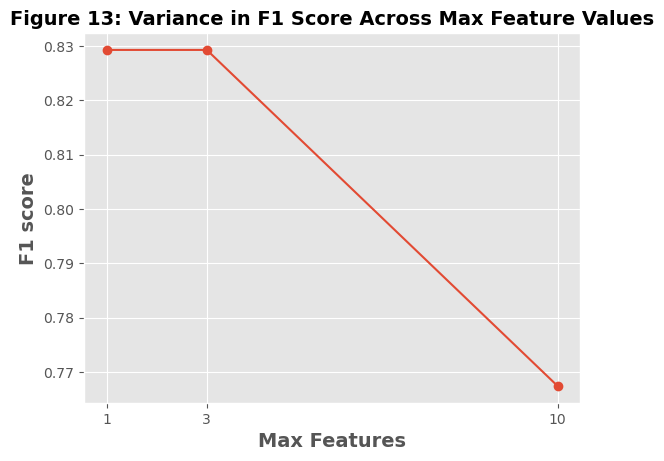

In [73]:
max_features = [1, 3, 10]
f1_scores = []

for feature in max_features:
    rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=feature,
                                 min_samples_split=3, min_samples_leaf=1, bootstrap=False, random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.plot(max_features, f1_scores, '-o')
plt.xlabel('Max Features', fontweight = "bold", fontsize = 14)
plt.ylabel('F1 score', fontsize = 14, fontweight = "bold")
plt.xticks(max_features)
plt.title('Figure 13: Variance in F1 Score Across Max Feature Values', fontsize = 14, fontweight = "bold")
plt.show()


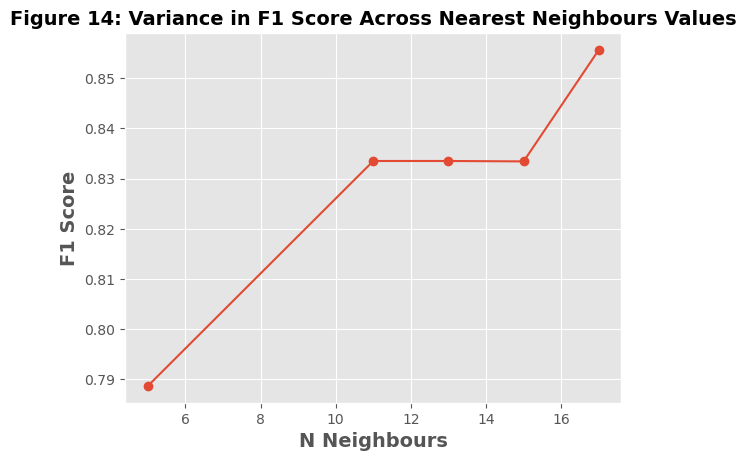

In [36]:
neighbours_range = [5,11,13,15,17]
f1_scores = []

for neighbours in neighbours_range:
    knn = KNeighborsClassifier(n_neighbors=neighbours, weights='distance', metric='euclidean', leaf_size=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(neighbours_range, f1_scores, marker='o')
plt.xlabel('N Neighbours', fontsize = 14, fontweight = "bold")
plt.ylabel('F1 Score', fontsize = 14, fontweight = "bold")
plt.title('Figure 14: Variance in F1 Score Across Nearest Neighbours Values', fontsize = 14, fontweight = "bold")
plt.show()


***Feature Importance***

random_forest feature importances:
max_hr_achieved            0.135284
thalassaemia               0.127201
num_major_vessels          0.125604
chest_pain_type            0.112053
st_depression              0.094054
age                        0.092416
resting_bp                 0.079001
cholesterol                0.076721
exercise_induced_angina    0.052484
st_slope                   0.044607
sex                        0.031854
rest_ecg                   0.019205
fasting_blood_sugar        0.009517
dtype: float64



knn feature importances:
max_hr_achieved            0.197306
cholesterol                0.089226
resting_bp                 0.057576
age                        0.038721
thalassaemia               0.010101
num_major_vessels          0.004377
st_depression              0.001010
chest_pain_type            0.000673
fasting_blood_sugar        0.000000
st_slope                   0.000000
sex                        0.000000
rest_ecg                   0.000000
exercise_induced_angin

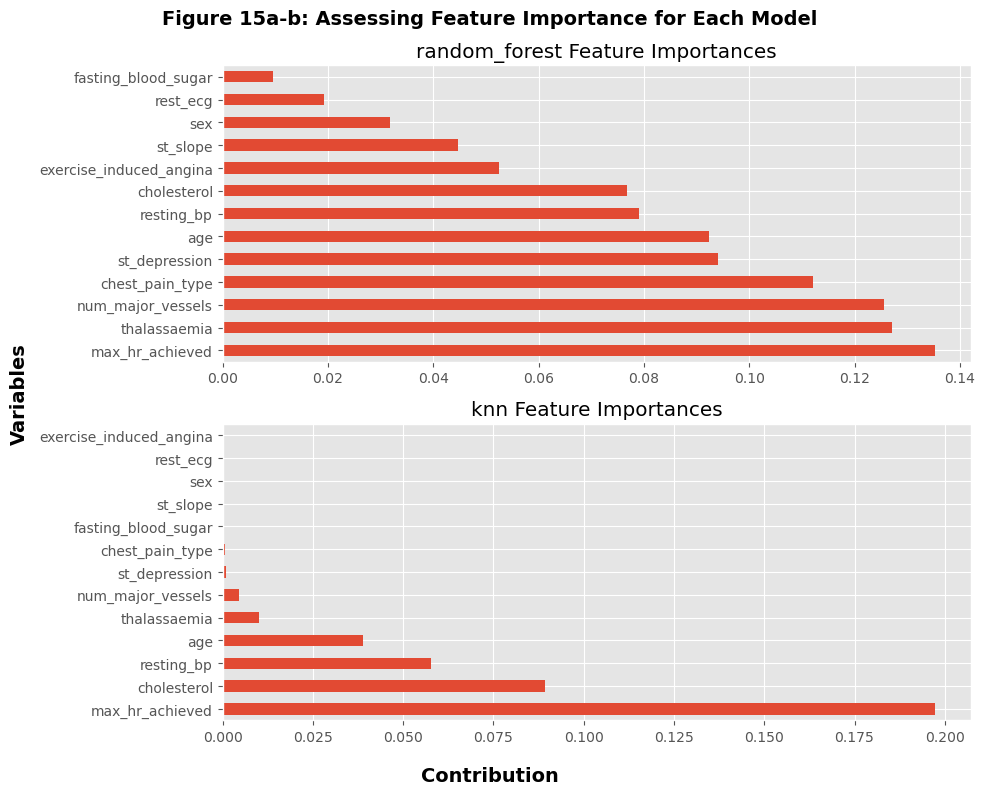

In [75]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

for ax, (name, clf) in zip(axes.flatten(), classifiers.items()):
    clf.fit(X, y)
    if hasattr(clf, "feature_importances_"):
        importances = clf.feature_importances_
    elif hasattr(clf, "coef_"):
        importances = clf.coef_.ravel()
    else:
        result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
        importances = result.importances_mean
    features = pd.Series(importances, index=X.columns)
    features_sorted = features.sort_values(ascending=False)  # sort features in descending order
    features_sorted.plot(kind="barh", ax=ax)
    ax.set_title(f"{name} Feature Importances")
    print(f"{name} feature importances:")
    print(features_sorted)
    print("\n\n")
    
plt.suptitle("Figure 15a-b: Assessing Feature Importance for Each Model", fontweight = "bold", fontsize = 14)
fig.supylabel("Variables", fontsize = 14, fontweight = "bold")
fig.supxlabel("Contribution", fontsize = 14, fontweight = "bold")
plt.tight_layout()
plt.show()


***ROCAUC Curve***

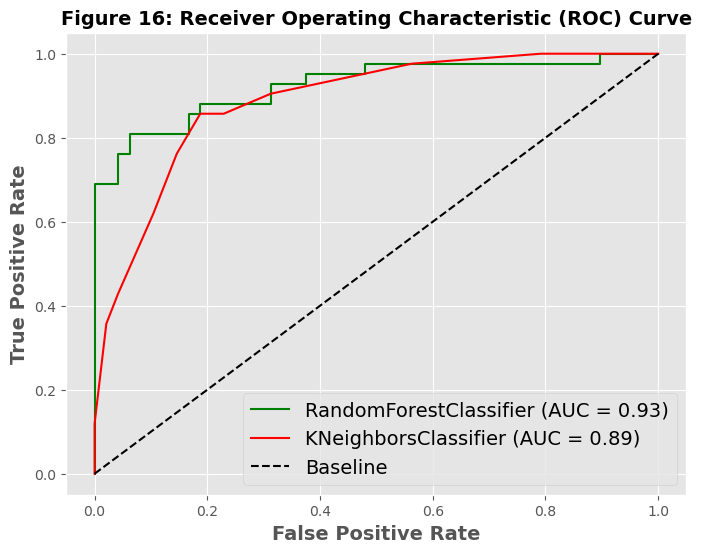

In [37]:
colours = ['green', 'red']

fig, ax = plt.subplots(figsize=(8, 6))
for i, clf in enumerate(best_estimators):
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colours[i], label=f'{name} (AUC = {auc_score:.2f})')
    
ax.plot([0, 1], [0, 1], color = "black", linestyle='--', label='Baseline')
    

ax.set_title('Figure 16: Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight = "bold")
ax.set_xlabel('False Positive Rate', fontsize=14, fontweight = "bold")
ax.set_ylabel('True Positive Rate', fontsize=14, fontweight = "bold")
ax.legend(loc='lower right', fontsize=14)
plt.show()
